<a href="https://colab.research.google.com/github/martasaparicio/lematecX/blob/main/02-new_data_preparation_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solved Exercise

## Introduction

In this exercise, we intend to predict whether a given passenger from the Titanic survived or not. To do this, we will take into account several characteristics of these passengers, such as the class they were travelling in, their age and their gender.

## Data

* Number of observations = 756
* Number of independent variables = 3
 1. PClass = class in which the passenger traveled
 1. Age = age of the passenger (years)
 1. Sex = gender of the passenger (1 if female, 0 if male) 
* Number of dependent variables = 1
 1. Survived = tells us if a passenger survived (1) or not (0)


Data available at: https://raw.githubusercontent.com/pmarcelino/datasets/master/titanic_fostwom.csv

**Note:** The dependent and independent variables are defined specifically using the information in the exercise's introduction. If in the introduction we were asked, for example, to predict the age using the other variables, the dependent variable would be 'Age' and not 'Survived'.

## Example

The first observation in the dataset that we will see in the Solution - the first row in the table that appears after doing `df` - refers to a passenger that:

* Was travelling in first class
* Was 29 years old
* Was female
* Survived the accident

In [ ]:
# Import libraries
import pandas as pd  
import seaborn as sns

from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

**Note:** If `FutureWarning` appears while you are importing the libraries, do not worry. This message appears associated with a library and serves only to inform you that some changes are ocurring in that library.

# Solution

1. Prepare data
2. Explore data
3. Train the model
4. Evaluate the model

## 1. Prepare Data

1. Import data
2. Remove observations with missing data

In [ ]:
# Import data
url = 'https://raw.githubusercontent.com/pmarcelino/datasets/master/titanic_fostwom.csv'
df = pd.read_csv(url)
df

,PClass,Age,Sex,Survived
0,1.0,29.0,1.0,1
1,1.0,2.0,0.0,0
2,1.0,NaN,0.0,0
3,NaN,25.0,1.0,0
4,1.0,1.0,0.0,1
...,...,...,...,...
751,3.0,27.0,0.0,0
752,3.0,26.0,0.0,0
753,NaN,22.0,0.0,0
754,3.0,24.0,0.0,0


* The import was successful
* We can confirm that there are 756 observations (`756 rows`)
* We can confirm that there are 3 + 1 variables (`4 columns`)
* There is missing data in some of the observations (NaN)

In [ ]:
# Remove observations with missing data
df = df.dropna()
df

,PClass,Age,Sex,Survived
0,1.0,29.0,1.0,1
1,1.0,2.0,0.0,0
4,1.0,1.0,0.0,1
5,1.0,47.0,0.0,1
6,1.0,63.0,1.0,1
...,...,...,...,...
749,3.0,27.0,0.0,0
751,3.0,27.0,0.0,0
752,3.0,26.0,0.0,0
754,3.0,24.0,0.0,0


* Number of available observations is reduced to 728 (`728 rows`)
* If the operation was performed well, we would now solely be left with complete observations (no missing data)

**Note:** Even though we have `728 rows`, the index goes up to 755. This is because the row indices do not change when the observations are eliminated. For this reason, the row with index 755 remained (it had no missing data) and, for example, the row with index 2 disappeared (it had missing data).

In [ ]:
# Check for missing data
df.isnull().sum()

PClass      0
Age         0
Sex         0
Survived    0
dtype: int64

* There are no variables with observations that have missing data
* We can confirm that we only have complete observations (full dataset)

## 2. Explore data

1. Visualize the relationship between the age of passengers and whether they survived or not, using a boxplot diagram

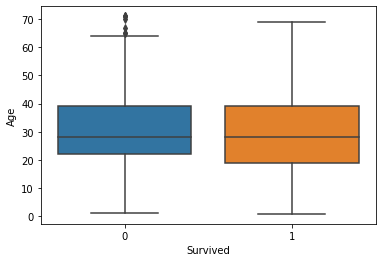

In [ ]:
# View the relationship between the age of passengers and whether or not they survived
sns.boxplot(x='Survived', y='Age', data=df)

* Age does not seem to influence survival
* This information is important because it gives us clues about the relationships between variables, helping us to understand the data 

## 3. Train the model

1. Prepare the data to apply the algorithm
  * Define independent and dependent variables
  * Split data into training and testing datasets
1. Define the algorithm to use to train the model
1. Train the model with the defined algorithm

In [ ]:
# Define independent and dependent variables
X = df.drop('Survived', axis=1)
y = df['Survived']

* To train the model, all independent variables must be numerical
* In this case, as all independent variables are numeric, we can just store the entire table in `X`, except for the column 'Survived' (which is why the `drop` function was used)


In [ ]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

* This function randomly splits the data between the training and testing datasets. By default, the `train_test_split` function places 75% of the data from the original dataset into the training dataset and the remaining 25% of the data into the test dataset.
* So that this division of data is always the same, we define the argument `random_state`.
* This way, if your code is run exactly like ours, you will get the same results.
* We used the number 42, but we could have used any other number.

In [ ]:
# Define the model's algorithm
model = RandomForestClassifier(random_state=7)

* We defined `random_state` for the above reasons

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

## 4. Evaluate model

1. Make predictions
2. Evaluate the model based on the predictions made 

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model using the success rate
accuracy_score(y_test, y_pred)

0.7802197802197802

* Our model has an success rate (`accuracy_score`) of approximately 78% 